In [1]:
%matplotlib notebook
from numpy import *
from matplotlib.pyplot import *
from numpy.linalg import qr 
from scipy.linalg import hilbert
from numpy.linalg import eig

In [2]:
def display_mat(msg,A):
    print(msg)
    display(A)
    print("")


<hr style="border-width:4px; border-color:coral"></hr>

# Homework 10 : Conditioning and stability of linear least squares

<hr style="border-width:4px; border-color:coral"></hr>

The least squares problem

\begin{equation}
A\mathbf x = \mathbf b
\end{equation}

where $A \in \mathcal R^{m \times n}$, $m \ge n$ has four associated "conditioning" problems, described in the table in Theorem 18.1 of TB (page 131).   These are 

1.  Sensitivity of $\mathbf y = A\mathbf x$ to right hand side vector $\mathbf b$, 

2.  Sensitivity of the solution $\mathbf x$ to right hand side vector $\mathbf b$, 

3.  Sensitivity of $\mathbf y = A\mathbf x$ to the coefficient matrix $A$, and

4.  Sensitivity of the solution $\mathbf x$ to the coefficient matrix $A$.



## Problem 1

<hr style="border-width:4px; border-color:coral"></hr>


**Sensitivity of $\mathbf y$ to a perturbation in $\mathbf b$.**

In TB Lecture 12, the relative condition number is defined as 

\begin{equation}
\kappa = \sup_{\delta x}\left(\frac{\Vert \delta f \Vert}{\Vert f(x) \Vert}\bigg/ \frac{\Vert \delta x \Vert}{\Vert x \Vert}\right)
\end{equation}

#### Problem 1(a)

 Arguing directly from this definition, establish the condition number of $\mathbf y$ with respect to perburbations in $\mathbf b$ given by TB Lecture 18 

\begin{equation}
\kappa = \frac{1}{\cos \theta}
\end{equation}

**Hint:** The input "$x$" in this problem is $\mathbf b$ and the output (or model) "$f$" is $\mathbf y$.  Show geometrically that the supremum is attained with $P\delta \mathbf b = \delta \mathbf b$.  

### Solution 
Since the relative condition number is defined as ;
\begin{equation}
\kappa = \sup_{\delta \mathbf x}\left(\frac{\Vert \delta \mathbf f \Vert}{\Vert \mathbf f(\mathbf x) \Vert}\bigg/ \frac{\Vert \delta \mathbf x \Vert}{\Vert \mathbf x \Vert}\right),
\end{equation}

then the relative condition number of $\mathbf y$ with respect to perburbations in $\mathbf b$ is given by;

\begin{equation}
\kappa = \sup_{\delta \mathbf b}\left(\frac{\Vert \delta \mathbf y \Vert}{\Vert \mathbf y \Vert}\bigg/ \frac{\Vert \delta \mathbf b \Vert}{\Vert \mathbf b \Vert}\right)
\end{equation}
where $\mathbf y = A\mathbf x = P \mathbf b$ is the the projetion of $\mathbf b$ onto the $range(A)$, $\delta \mathbf b$ is a pertubation  in $\mathbf b$ with a correponding pertubation $\delta \mathbf y$ in $\mathbf y$ (which is the projetion of $\delta \mathbf b$ onto the $range(A)$) . 
All this is illustrated geometrically in the image  below;

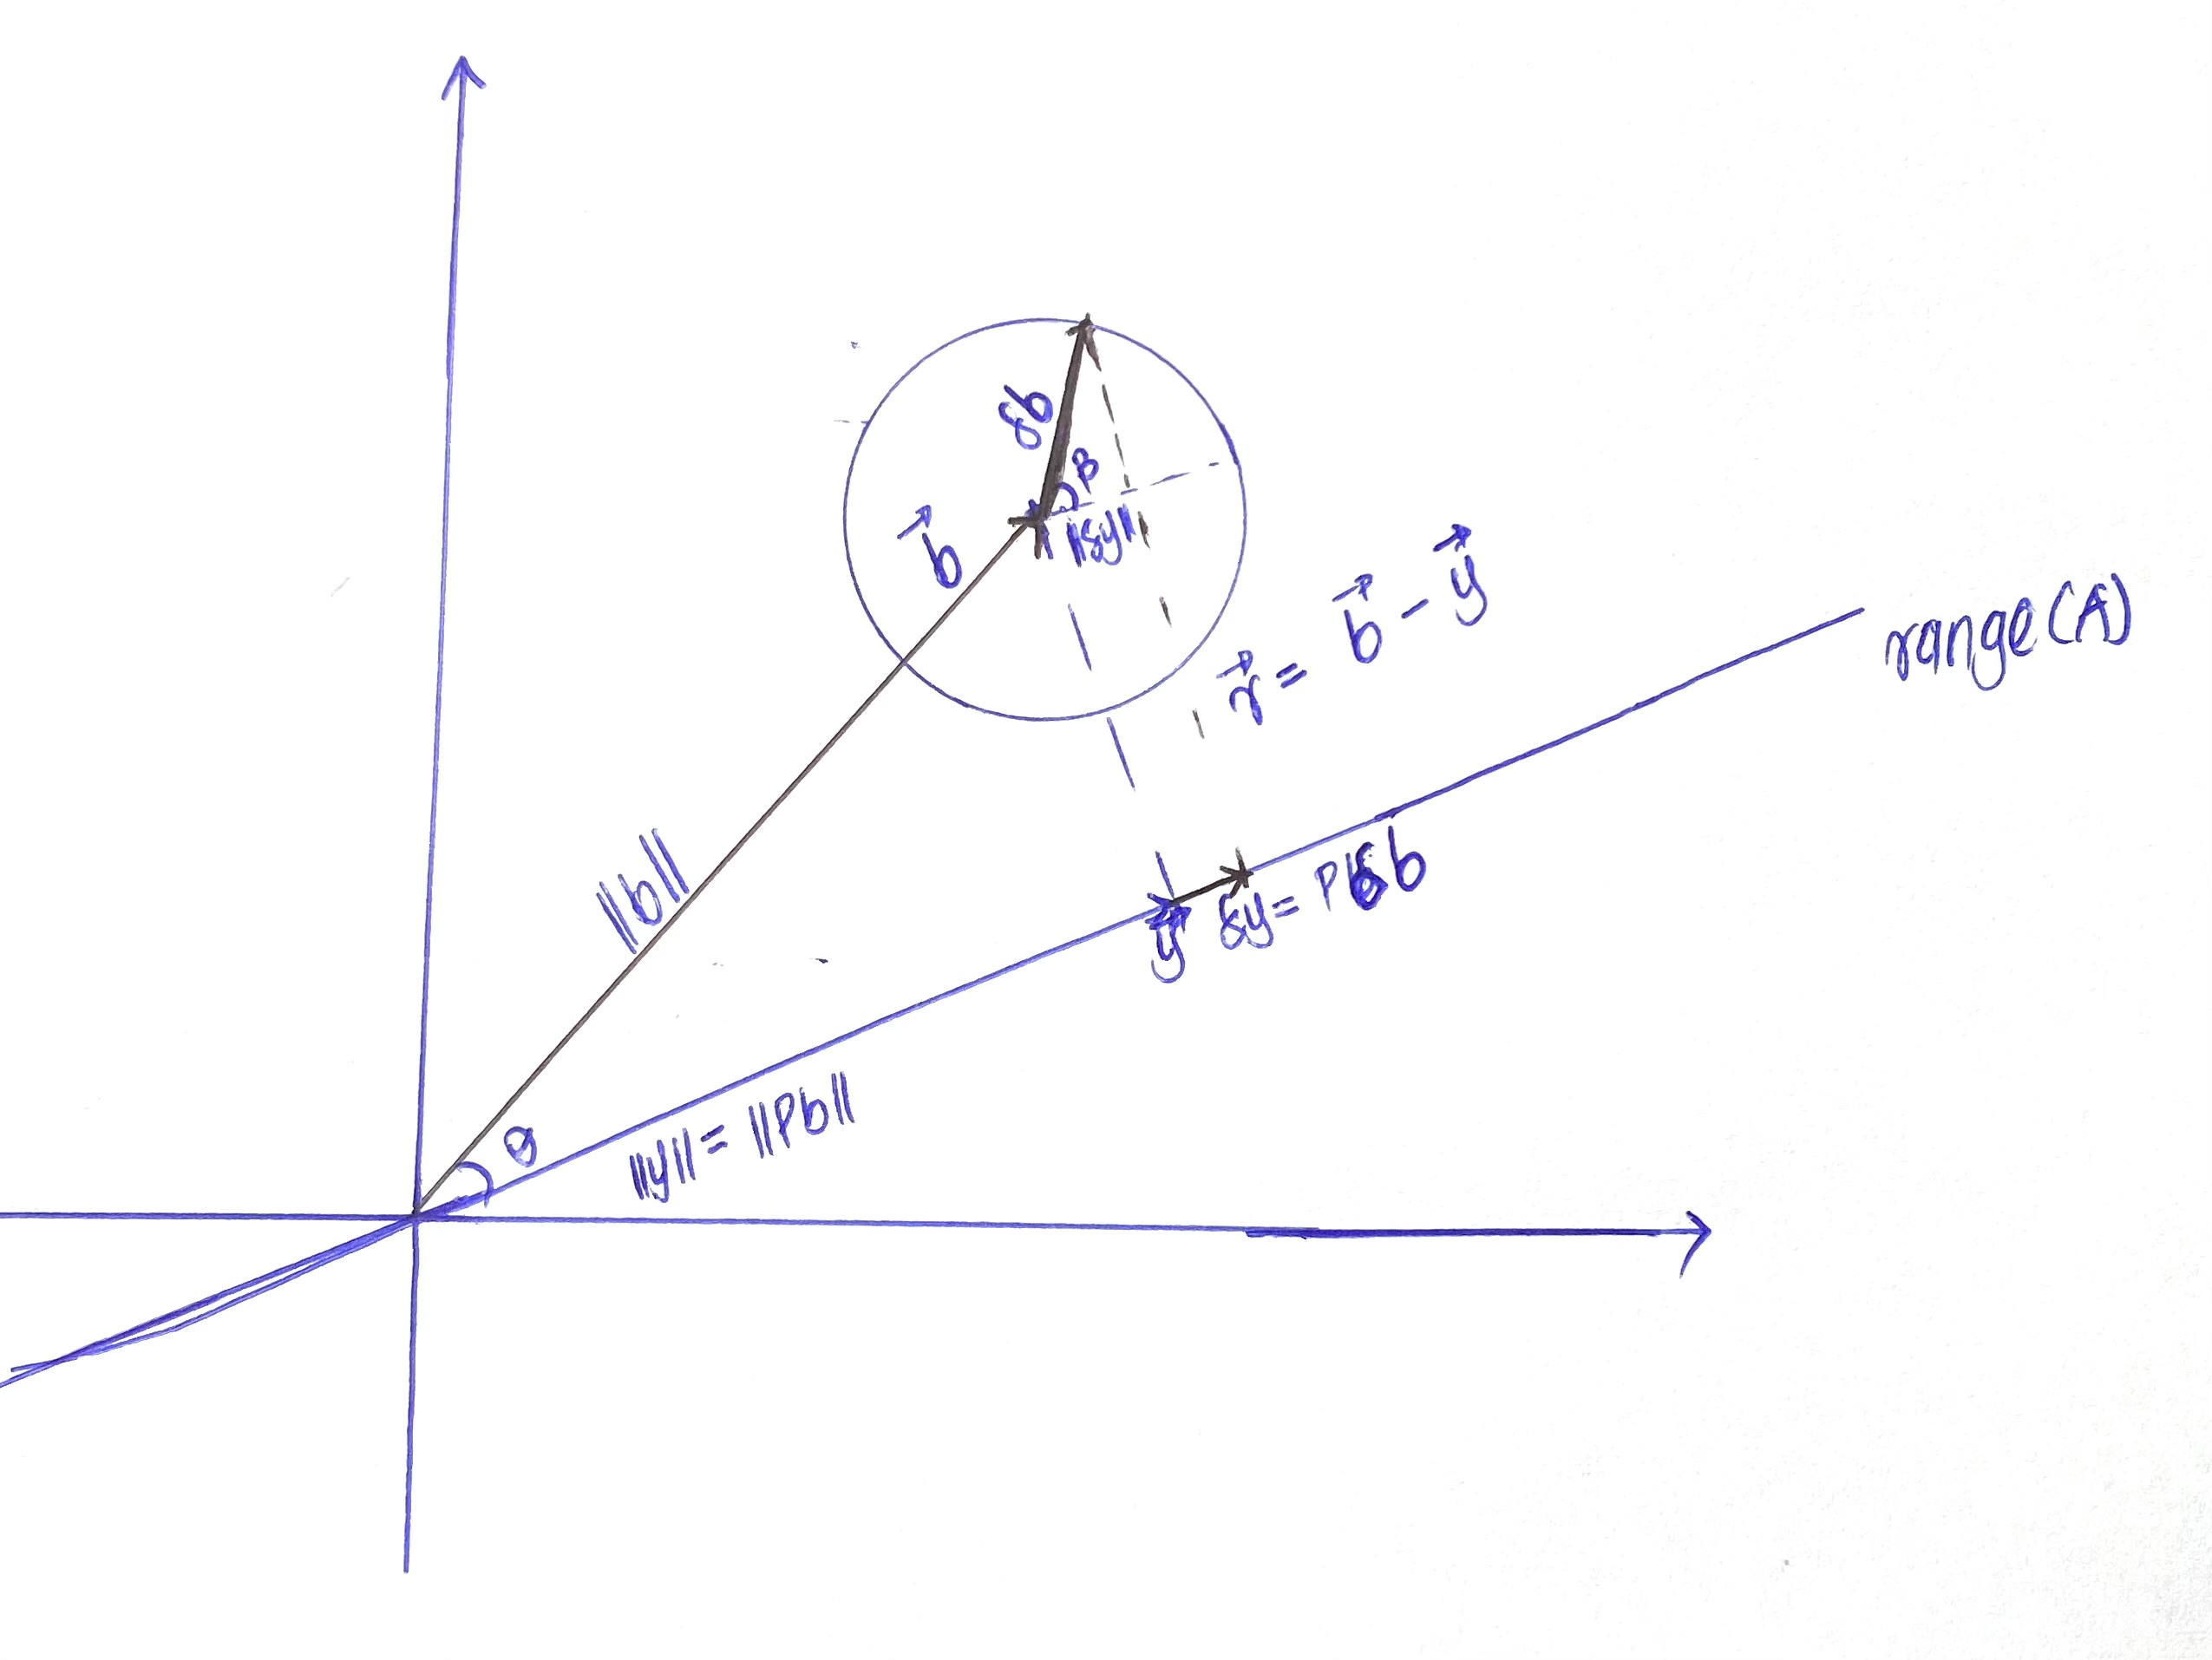


From the above image we notice that $\cos (\theta) = \frac{\Vert y \Vert}{\Vert b \Vert}$ where $\theta$ is the angle between $\mathbf b$ and the $range(A)$.

The relative condition number of $\mathbf y$ with respect to perburbations in $\mathbf b$ then becomes;

\begin{align*}
\kappa &= \sup_{\delta \mathbf b}\left(\frac{1}{\cos (\theta)}\times \frac{\Vert \delta \mathbf y \Vert}{\Vert \delta \mathbf b \Vert}\right)\\\\
&= \sup_{\delta \mathbf b}\left(\frac{1}{\cos (\theta)}\times \frac{\Vert P\delta \mathbf b \Vert}{\Vert \delta \mathbf b \Vert}\right)\\\\
&= \frac{1}{\cos (\theta)}\times \sup_{\delta \mathbf b}\left(\frac{\Vert P\delta \mathbf b  \Vert}{\Vert \delta \mathbf b \Vert}\right)
\end{align*}

But to find the $\sup_{\delta \mathbf b}\left(\frac{\Vert P\delta \mathbf b  \Vert}{\Vert \delta \mathbf b \Vert}\right)$, we must maximize the ratio $\frac{\Vert P\delta \mathbf  b  \Vert}{\Vert \delta \mathbf b \Vert}$.

From the diagram above we see that; for $0<\beta< \pi/2$, $\Vert \delta \mathbf b \Vert$ will always be greater than $\Vert \delta \mathbf y \Vert$ and therefore to maximize $\frac{\Vert P\delta \mathbf b  \Vert}{\Vert \delta \mathbf b \Vert}$, $\beta$ must be equal to zero and $\Vert \delta \mathbf b \Vert = \Vert P\delta \mathbf b \Vert$.

This means that we obtain $\sup_{\delta \mathbf b}\left(\frac{\Vert P\delta \mathbf b  \Vert}{\Vert \delta \mathbf b \Vert}\right)$ when $\Vert \delta \mathbf b \Vert = \Vert P\delta \mathbf b \Vert$ and therefore the condition number of $\mathbf y$ with respect to perburbations in $\mathbf b$ becomes;
\begin{equation}
\kappa = \frac{1}{\cos \theta}
\end{equation}

#### Problem 1(b)
For $\theta = \pi/2$, the condition number is $\infty$.  Illustrate what this means by considering the least squares problem

\begin{equation}
\begin{bmatrix} 2 \\ 1 \end{bmatrix}
\begin{bmatrix} x \end{bmatrix} = 
\begin{bmatrix} -1 \\ 2 \end{bmatrix}
\end{equation}

Use the results in TB 11.11 and 11.12 (page 82) to determine the projection operator $P$ for this problem.  Then compute $\mathbf y = P\mathbf b$ and show that $P\mathbf b = 0$.  Find a perturbation $\delta \mathbf b$ so that $P\delta \mathbf b = \delta \mathbf b = \delta \mathbf y \ne 0$. Explain what a condition number $\kappa=\infty$ might mean here.  Illustrate your argument graphically. 

### Solution
From the above system we have that;

$A = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$ and $\mathbf b = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$


To find the the projection operator for this problem, we use $P = AA^\dagger$, but 
\begin{align*}
A^\dagger &= (A^TA)A^T\\
& = \bigg( \begin{bmatrix} 2 & 1 \end{bmatrix} \begin{bmatrix} 2 \\ 1 \end{bmatrix}\bigg)^{-1} \begin{bmatrix} 2 & 1 \end{bmatrix}\\
&= \frac{1}{5}\begin{bmatrix} 2 & 1 \end{bmatrix}\\
\Rightarrow P & = \frac{1}{5}\begin{bmatrix} 2 \\ 1 \end{bmatrix}\begin{bmatrix} 2 & 1 \end{bmatrix}\\
& = \begin{bmatrix} \frac{4}{5}&\frac{2}{5} \\ \frac{2}{5}&\frac{1}{5} \end{bmatrix}\\
\Rightarrow \mathbf y = P\mathbf b & = \begin{bmatrix} \frac{4}{5}&\frac{2}{5} \\ \frac{2}{5}&\frac{1}{5} \end{bmatrix}\begin{bmatrix} -1 \\ 2 \end{bmatrix}\\
& = \begin{bmatrix} \frac{-4}{5}+\frac{4}{5} \\ \frac{-2}{5}+\frac{2}{5} \end{bmatrix}\\
\therefore P\mathbf b & = \begin{bmatrix} 0\\0 \end{bmatrix} = \mathbf 0\\
\end{align*}

To find $\delta \mathbf b$, will let $\delta \mathbf b = \mathbf b + \mathbf u$ where $\mathbf b = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$ and $\mathbf u = \begin{bmatrix} x \\ y \end{bmatrix}$such that $P\delta \mathbf b = \delta \mathbf b$ that is;
\begin{align*}
\Rightarrow P(\mathbf b + \mathbf u) &= (\mathbf b + \mathbf u)  \\ 
\Rightarrow \frac{1}{5}  \begin{bmatrix} 4&2 \\ 2&1\end{bmatrix} \begin{bmatrix} -1+x \\ 2+ y \end{bmatrix}  &= \bigg(\begin{bmatrix} -1+x \\ 2+ y \end{bmatrix}\bigg) \\\\
\Rightarrow  \begin{bmatrix} 4x+2y \\ 2x+y &\end{bmatrix}   &=  \bigg(\begin{bmatrix} -5+5x \\ 10+ 5y \end{bmatrix}\bigg) \\
\end{align*}
Equating elements in the two vectors we obtain;
\begin{align} x = 2y+5\\ -4y = 10-2x\end{align}
Subbstituting for x in equation (26), we obtain;
\begin{align}  -4y = 10-2(2y+5)\\ \Rightarrow 0= 0\end{align}
This means that $y$ can take on any real number ie. $y = t\in\mathbb R$.

Chosing $y = t =0 $, this gives $x = 5$ and $\mathbf u = \begin{bmatrix} 5 \\ 0 \end{bmatrix}$

\begin{align*} 
\Rightarrow  \delta \mathbf b &= \begin{bmatrix} -1+5 \\ 2+ 0 \end{bmatrix}\\  
&= \begin{bmatrix} 4 \\ 2\end{bmatrix}\\ 
\therefore \delta \mathbf y =  P \delta \mathbf b &= \frac{1}{5}  \begin{bmatrix} 4&2 \\ 2&1\end{bmatrix}\begin{bmatrix} 4 \\ 2\end{bmatrix} = \begin{bmatrix} 4 \\ 2\end{bmatrix} = \delta \mathbf b  
\end{align*}

This can be geometrically illustrated as shown in the image below;

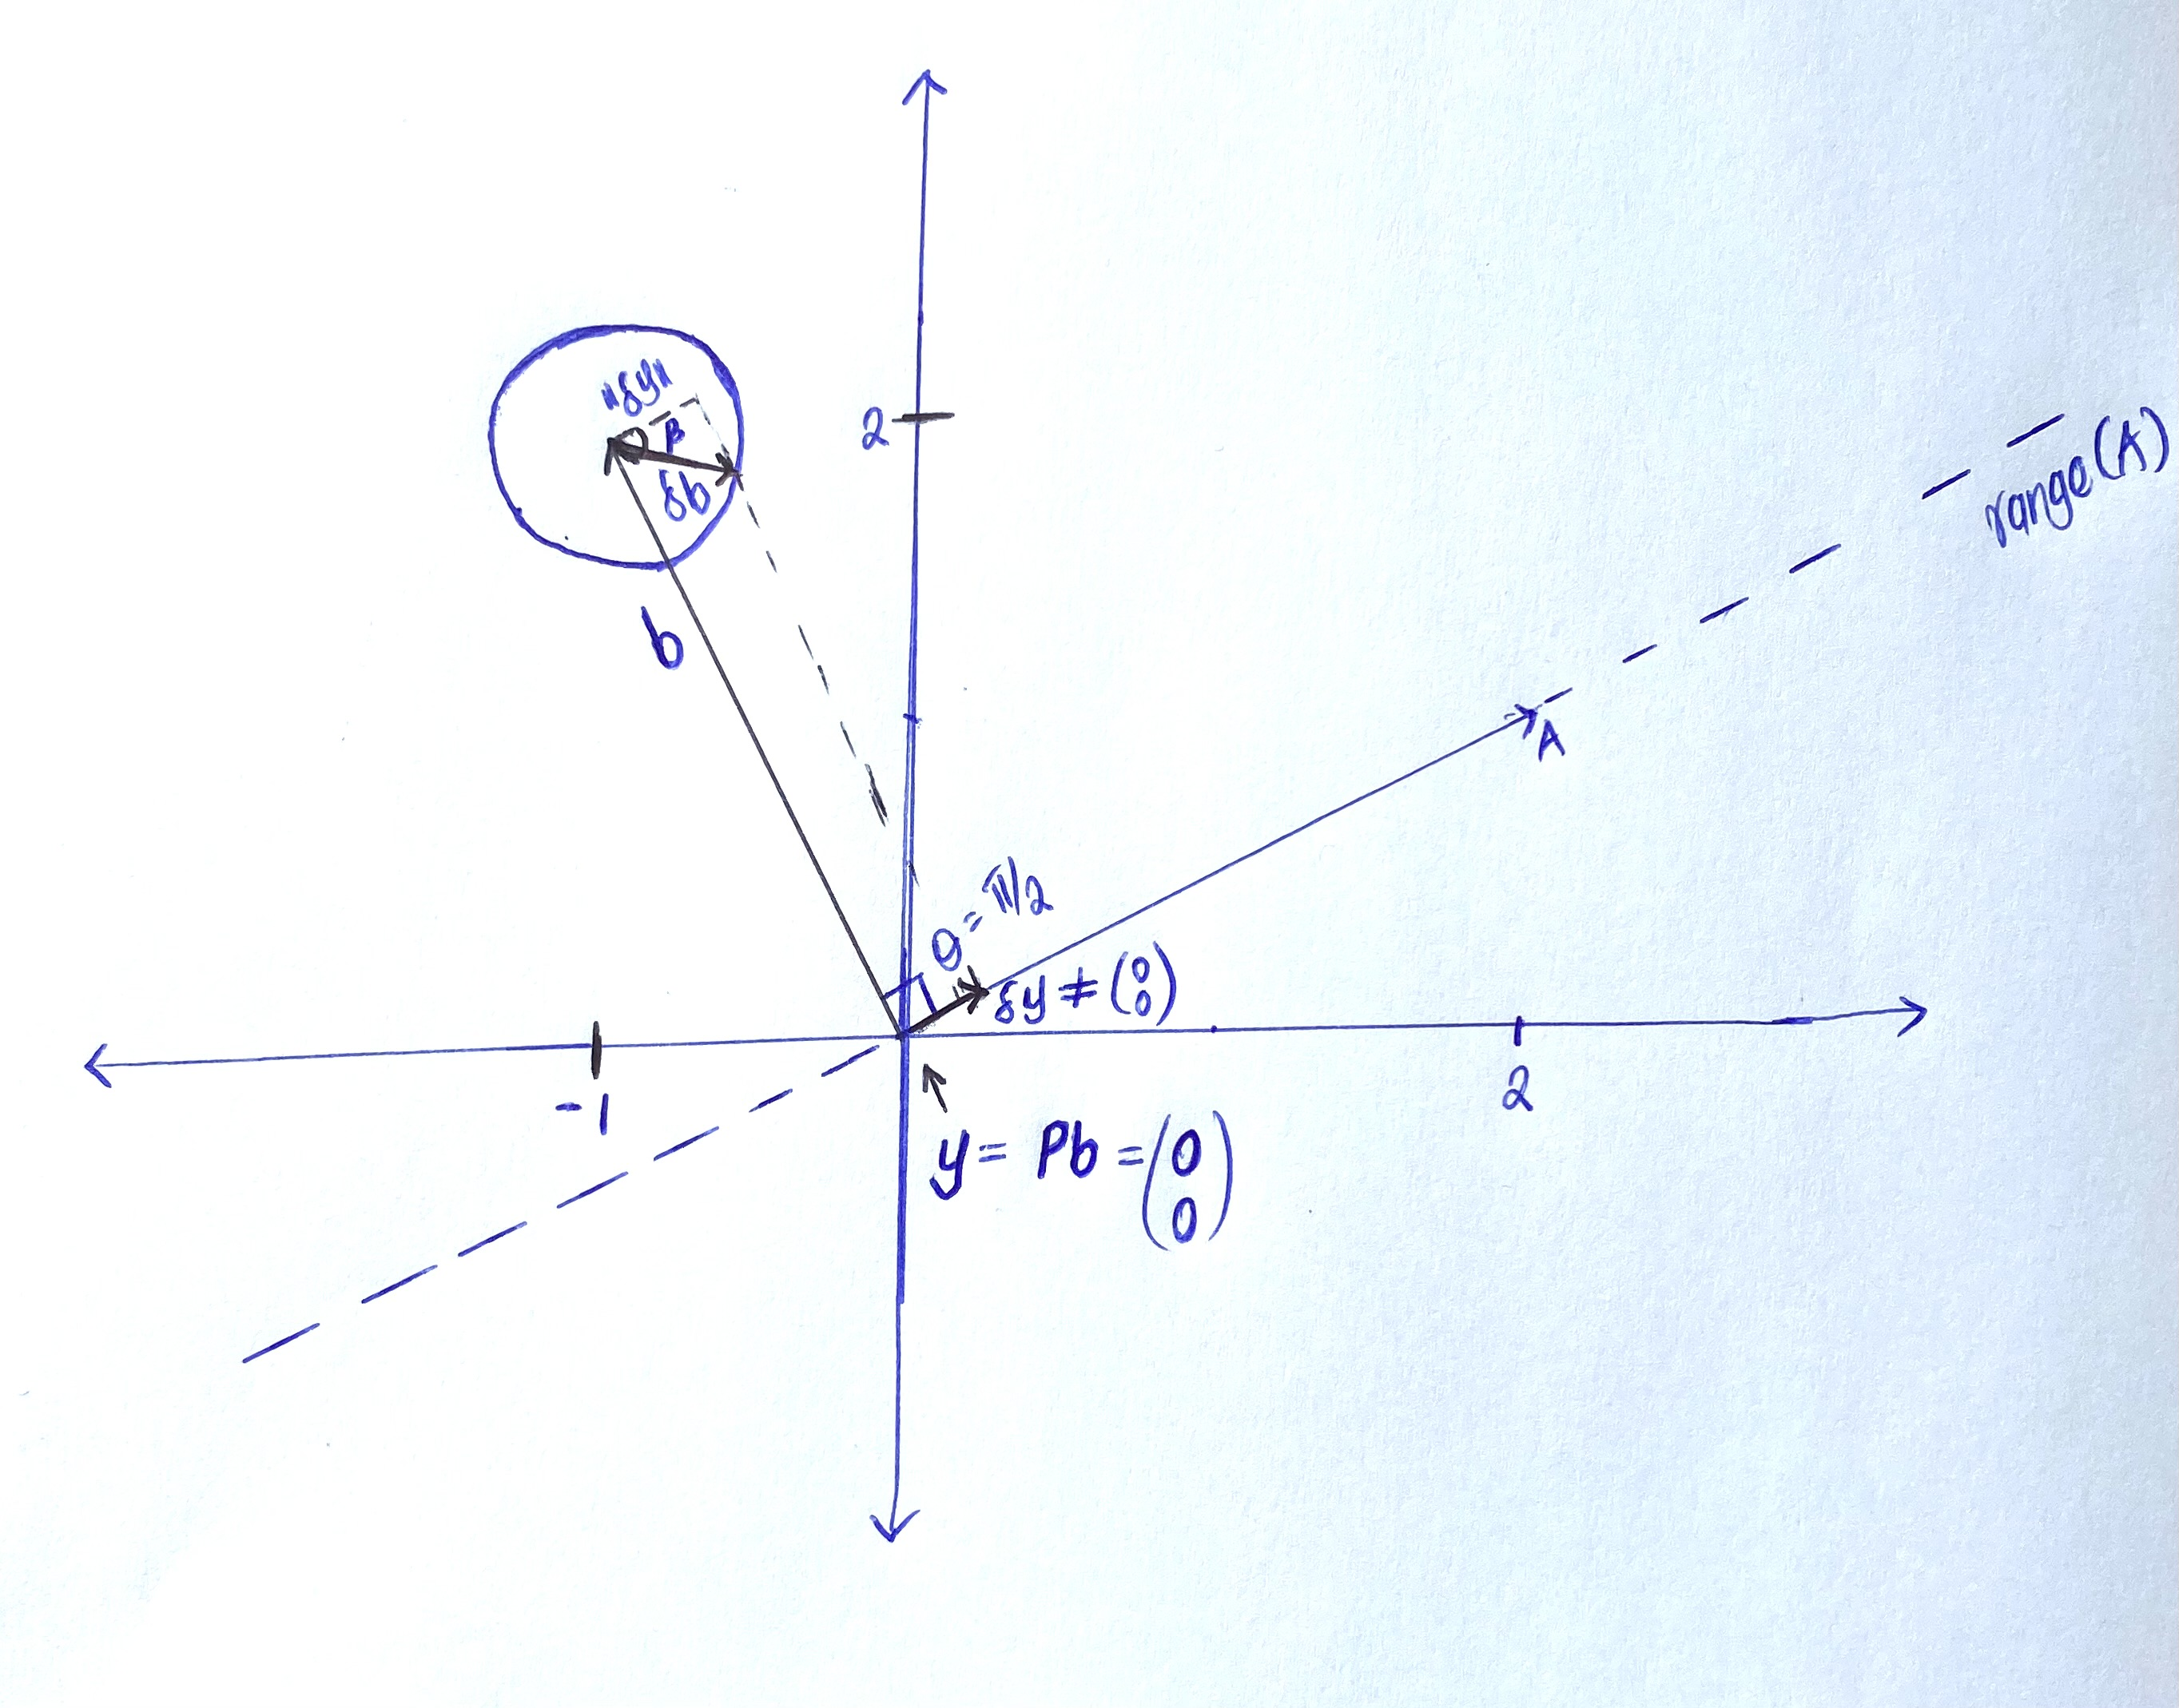


From the graph above, we see that the projection of $\mathbf b$ onto the $range(A)$ is a zero vector, that is $\mathbf y = P\mathbf b = \mathbf 0$. Surprisingly, a small change in $\mathbf b$ say $\delta \mathbf b$ results into non-zero pertubation $\delta \mathbf y$ in the projection. This means that the residual $\mathbf r = \mathbf b - A \mathbf x = \mathbf b$ and the change in solution is very very large.

Using all the above ideas we conclude that when $\theta = \pi/2$, the condition number blows uop that is $\kappa = \infty$.

The same conclusion can be reached by using the definition of the condition number of $\mathbf y$ with respect to perburbations in $\mathbf b$; $$\kappa=\frac{1}{cos(\theta)} = \frac{1}{cos(\pi/2)} = \infty$$


#### Problem 1(c)

Now consider the problem

\begin{equation}
\begin{bmatrix} 2 \\ 1 \end{bmatrix}
\begin{bmatrix} x \end{bmatrix} = 
\begin{bmatrix} 2 \\ 1 \end{bmatrix}
\end{equation}

For this problem, show that $\kappa = 1$.  What is qualitatively different about this problem than the problem in which $\kappa = \infty$?  

### Solution
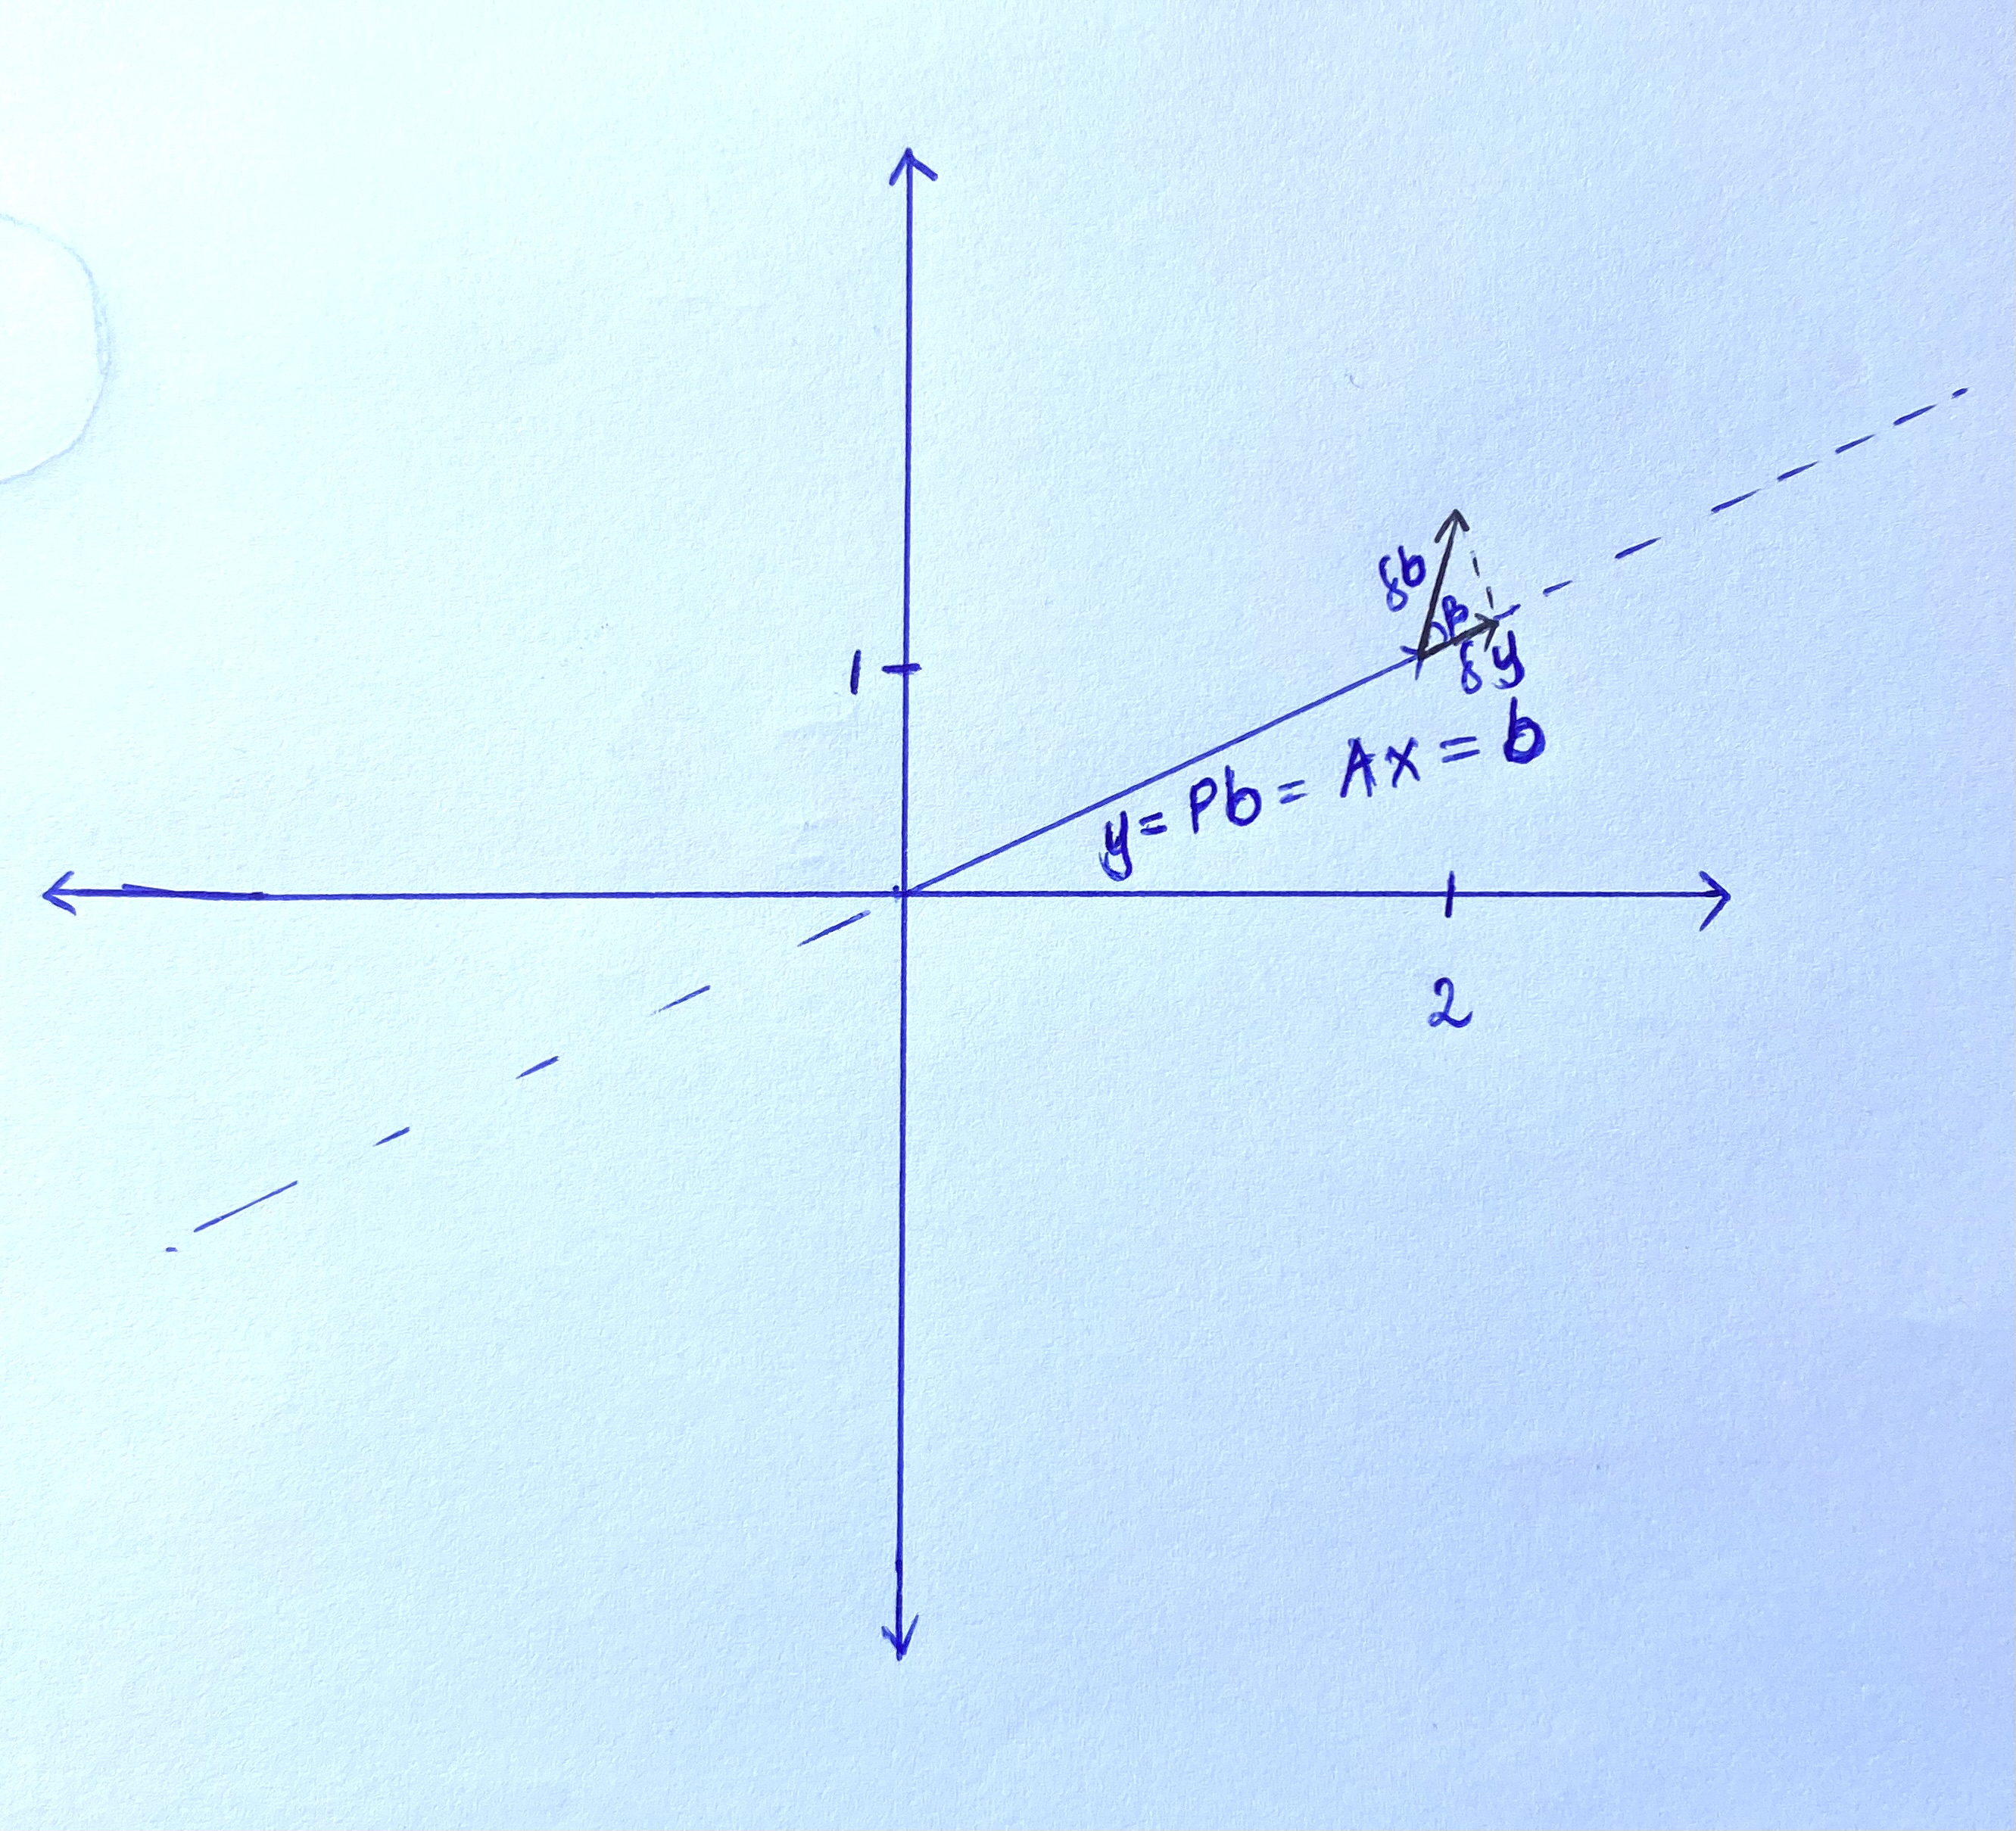

Since in 1(a) we proved that $\kappa = \frac{1}{\cos(\theta)}$ and the angle between $\mathbf b$ and the $range(A)$ is zero, the condition numder for this case is then given as;
$$\kappa=\frac{1}{cos(\theta)} = \frac{1}{cos(0)} = 1$$



For this problem, we see that the projection of $\mathbf b$  onto the column space of $A$ is $\mathbf b$ itself, that is $\mathbf y = P\mathbf b = \mathbf  b$. This means that $\mathbf b$ is in the $range(A)$, the residual $\mathbf r = \mathbf b - A \mathbf x = \mathbf 0$ and that the change in the solution is very very small which isn't the case when $\kappa = \infty$.

In [3]:
A1=array([[2,1]]).T
Ad = linalg.inv( (A1.T@A1))@A1.T
b=array([[-1,2]]).T
P=A1@Ad
P@b
A1.T@A1
P

array([[0.8, 0.4],
       [0.4, 0.2]])

## Problem 2

<hr style="border-width:4px; border-color:coral"></hr>

Problem 18.1 in TB (page 136) 

##### 2(a)

In [4]:

A=array([[1,1],[1,1.0001],[1,1.0001]])
b=array([[2],[0.0001],[4.0001]])
#A_inv = linalg.pinv(A)
A_inv = linalg.inv(A.T@A)@A.T
P=A@A_inv

display_mat(" A = ",A)
display_mat("Pseudo inverse of matrix A = ",A_inv)
display_mat("P = ",P)

 A = 


array([[1.    , 1.    ],
       [1.    , 1.0001],
       [1.    , 1.0001]])


Pseudo inverse of matrix A = 


array([[10000.99935019, -4999.99967515, -4999.99967515],
       [-9999.99935025,  4999.99967515,  4999.99967515]])


P = 


array([[9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [5.36965672e-09, 4.99999968e-01, 4.99999968e-01],
       [5.36965672e-09, 4.99999968e-01, 4.99999968e-01]])

##### 2(b)

In [5]:
#x1 = linalg.lstsq(A,b)
#display_mat(" x = ",x1[0])
x = A_inv@b
y = P@b

display_mat(" x = ",x)
display_mat(" y = ",y)

 x = 


array([[0.99999983],
       [1.00000005]])


 y = 


array([[1.99999988],
       [2.00009988],
       [2.00009988]])

##### 2(c)

In [6]:
k =linalg.cond(A)
K = linalg.norm(A)*linalg.norm(A_inv)
theta = arccos(linalg.norm(y)/linalg.norm(b))
eta = (linalg.norm(A)*linalg.norm(x))/linalg.norm(y)

display_mat(" K(A) = ",k)
display_mat(" theta = ",theta)
display_mat(" eta = ",eta)

 K(A) = 


42429.235416083044


 theta = 


0.6847029462598617


 eta = 


1.0000000008298253

##### 2(d)

In [7]:
##d
K_by = 1/cos(theta)
K_bx = k/(eta*cos(theta))
K_Ay = k/(cos(theta))
K_Ax = k+ (((k**2) *tan(theta))/eta)
display_mat(" K_by = ",K_by)
display_mat(" K_bx = ",K_bx)
display_mat(" K_Ay = ",K_Ay)
display_mat(" K_Ax = ",K_Ax)

 K_by = 


1.290977313022721


 K_bx = 


54775.18028560952


 K_Ay = 


54775.18033106335


 K_Ax = 


1469883471.4735608

##### 2(e)

## Problem 3

<hr style="border-width:4px; border-color:coral"></hr>

Show that if $(\lambda,\mathbf v)$ is an eigenvalue/eigenvector pair for matrix $A$, then $((\lambda-\mu)^{-1}, \mathbf v)$ is an eigenvalue/eigenvector pair for the matrix $(A - \mu I)^{-1}$. 

Why is this observation useful when using the power iteration to find an eigenvalue close to $\mu$?   

##### Solution
If $\lambda$ is an eigenvalue  of matrix $A$ with a corresponding eigenvector $\mathbf v$, then we have that;

\begin{equation}
A \mathbf v = \lambda \mathbf v
\end{equation}

Subtracting $\mu \mathbf v$ from equation() above we obtain;

\begin{align}
A \mathbf v - \mu \mathbf v = \lambda \mathbf v - \mu \mathbf v\\
(A-\mu I)\mathbf v = (\lambda-\mu)\mathbf v\\
%\Rightarrow \frac{1}{} = \frac{}{}
\end{align}

Since $\mu \in \mathbb{R}$ is not an eigenvalue of $A$, then $A-\mu I$ is invertible and therefore multiplying the above equation with $(A-\mu I)^{-1}$, we get;

\begin{align}
(A-\mu I)^{-1}(A-\mu I)\mathbf v &= (\lambda-\mu)(A-\mu I)^{-1} \mathbf v\\\\
\Rightarrow \mathbf v &= (\lambda-\mu) (A-\mu I)^{-1}\mathbf v\\\\
\Rightarrow (A-\mu I)^{-1}\mathbf v &= (\lambda-\mu)^{-1} \mathbf v
\end{align}

Therefore from the above equation, we can conclude that $((\lambda-\mu)^{-1}, \mathbf v)$ is an eigenvalue/eigenvector pair for the matrix $(A - \mu I)^{-1}$.

???????
Why is this observation useful when using the power iteration to find an eigenvalue close to $\mu$? 

## Problem 4

<hr style="border-width:4px; border-color:coral"></hr>

Exercise 29.1 (Lecture 29, TB page 223).  This is a five part problem that asks you to code an eigenvalue solver for a real, symmetric matrix using the shifted $QR$ algorithm.   Do your code in Python, using the Numpy `qr` algorithm where needed.  

The basic steps are : 

1.  Reduce your matrix $A$ to tridiagonal form.  You may use the hessenberg code we wrote in class. 

2.  Implement the unshifted $QR$ code (also done in class).  Use the Numpy routine `qr`.   Your iteration should stop when the off diagonal elements are smaller (in absolute value) than  $\tau \approx 10^{-12}$.  

3.  Find all eigenvalues of a matrix $A$ using the "deflation" idea described in Algorithm 28.2. 

4. Introduce the Wilkinson shift, described in Lecture 29.   

#### Notes

* Your code should work for a real, symmetrix matrix

* Your code does not have to be efficient in the sense of optimizing the cost of matrix/vector multiplies and so on.  

* Apply your algorithm to the Hilbert matrix `scipy.linalg.hilbert`.  The entries of the $m \times m$ Hilbert matrix are given by 

\begin{equation}
H_{ij} = \frac{1}{i + j - 1}, \qquad i,j = 1,2,\dots m
\end{equation}


In [8]:
def display_mat(msg,A):
    print(msg)
    fstr = {'float' : "{:>10.8f}".format}
    with printoptions(formatter=fstr):
        display(A)
    print("")

In [9]:
def hessenberg(A): 
    m,n = A.shape 
    assert m == n, "A must be square" 
     
    H = A.copy() 
    Qt = eye(m) 
    for j in range(m-1): 
        x = H[j+1:,j:j+1]         
        I = eye(m-j-1) 
        s = 1 if x[0] > 0 else -1     # sign function, with sign(0)  = 1 
        v = s*linalg.norm(x,2)*I[:,0:1] + x 
 
        vn = linalg.norm(v,2)
        if vn!=0:
            v = v/vn 
            F = I - 2*(v@v.T) 
            H[j+1:,j:] = F@H[j+1:,j:] 
            H[0:,j+1:] = H[0:,j+1:]@F   # Apply F to the right side of H.  
            break

    return H 

In [10]:
def eigenvalue_QR_solver(A,kmax,method=''):
        H = hessenberg(A)
        m = size(H,0)
        Ak = H.copy() 
        mu = 0
        e = zeros((kmax,1)) 
        lam = zeros((m,1))
        for k in range(kmax):
            m = size(Ak,0)
            mu = 0
            Q,R = qr(Ak - mu*eye(m))   
            Ak = R@Q + mu*eye(m) 
            #e[1:k] = abs(Ak[-1,-2]) 
            if method == 'unshifted':
                mu=mu
                if abs(Ak[-1,-2]) < 1e-16:
                    print ("number of iterations required=",k+1)
                    lam[0:m]  = array([diag(Ak)]).T
                    break
            elif method =='Rayleigh shift':
                mu = Ak[-1,-1]
                if m==1:
                    e[0] = abs(Ak[-1,-1])
                    lam[0] = Ak[-1,-1]
                    print ("number of iterations required to find the eigenvalue below=",k+1)
                    print("eigenvalue = {:12.4e} \n".format(Ak[-1,-1]))
                    break

                else:
                    e[1:k] = abs(Ak[-1,-2]) 
                    if  abs(Ak[-1,-2]) < 1e-12:
                        print ("number of iterations required to find the eigenvalue below=",k+1)
                        print("eigenvalue = {:12.4e} \n".format(Ak[-1,-1]))
                        lam[1:m]= Ak[-1,-1]
                        Ak = Ak[0:m-1,0:m-1]
            elif method=='Wilkinson shift':
                if m==1:
                    print ("number of iterations required to find the eigenvalue below=",k+1)
                    print("eigenvalue = {:12.4e} \n".format(Ak[-1,-1]))
                    lam[0]=Ak[0,0]
                    break
                else:
                    sigma = (Ak[-2,-2]-Ak[-1,-1])/2
                    if sigma !=0:
                        sn = sign(sigma)
                    else:
                        sn = -1
                    mu = Ak[m-1,m-1] - (sn*Ak[m-2,m-1]**2/(abs(sigma) + sqrt(sigma**2+Ak[m-2,m-1]**2)))
                    if abs(Ak[-1,-2]) < 1e-12:
                        print ("number of iterations required to find the eigenvalue below=",k+1)
                        print("eigenvalue = {:12.4e} \n".format(Ak[-1,-1]))
                        lam[1:m]= Ak[-1,-1]
                        Ak = Ak[0:m-1,0:m-1]


        return e,sort(lam)[::-1]

In [11]:
H = hilbert(4)

In [12]:
# TRUE EIGENVALUES
eval_true1,evec_true = eig(H)
eval_true1 = sort(array(eval_true1).reshape(size(H,0),1),axis=0)
eval_true1 = sort(eval_true1)
eval_true1

array([[9.67023040e-05],
       [6.73827361e-03],
       [1.69141220e-01],
       [1.50021428e+00]])

In [13]:
# USING UNSHIFTED QR
e1,lam1= eigenvalue_QR_solver(H,kmax= 20,method='unshifted')
#lam1 = sort(lam1)[::-1]
display_mat("Eigenvalues = ",lam1) 
display_mat("Error = ",linalg.norm(eval_true1 - lam1)) 


number of iterations required= 8
Eigenvalues = 


array([[0.00009670],
       [0.00673827],
       [0.16914122],
       [1.50021428]])


Error = 


8.329327586204261e-16

In [14]:
#USING RAYLEIGH SHIFT
e2,lam2= eigenvalue_QR_solver(H,kmax= 20,method='Rayleigh shift')
#lam2 = sort(lam2)[::-1]
display_mat("Eigenvalues = ",lam2) 
display_mat("Error = ",linalg.norm(eval_true1 - lam2)) 


number of iterations required to find the eigenvalue below= 6
eigenvalue =   9.6702e-05 

number of iterations required to find the eigenvalue below= 8
eigenvalue =   6.7383e-03 

number of iterations required to find the eigenvalue below= 13
eigenvalue =   1.6914e-01 

number of iterations required to find the eigenvalue below= 14
eigenvalue =   1.5002e+00 

Eigenvalues = 


array([[0.00009670],
       [0.00673827],
       [0.16914122],
       [1.50021428]])


Error = 


2.2303812898233666e-16

In [15]:
# USING WILKINSON SHIFT

e3,lam3= eigenvalue_QR_solver(H,kmax= 20,method='Wilkinson shift')
#lam3 = sort(lam3)[::-1]
display_mat("Eigenvalues = ",lam3) 
display_mat("Error = ",linalg.norm(eval_true1 - lam3)) 

number of iterations required to find the eigenvalue below= 6
eigenvalue =   9.6702e-05 

number of iterations required to find the eigenvalue below= 8
eigenvalue =   6.7383e-03 

number of iterations required to find the eigenvalue below= 13
eigenvalue =   1.6914e-01 

number of iterations required to find the eigenvalue below= 14
eigenvalue =   1.5002e+00 

Eigenvalues = 


array([[0.00009670],
       [0.00673827],
       [0.16914122],
       [1.50021428]])


Error = 


2.2303812898233666e-16

## Part (e)

In [16]:
a = arange(15,0,-1)
A = diag(a) + ones((15,15))

In [17]:
# TRUE EIGENVALUES
eval_true,evec_true = eig(A)
eval_true = sort(array(eval_true).reshape(size(A,0),1),axis=0)
eval_true = sort(eval_true)
eval_true

array([[ 1.21465537],
       [ 2.25695098],
       [ 3.28777559],
       [ 4.31431185],
       [ 5.33895988],
       [ 6.36294449],
       [ 7.38709275],
       [ 8.41211207],
       [ 9.43874576],
       [10.46792166],
       [11.50098302],
       [12.54018637],
       [13.59013196],
       [14.664097  ],
       [24.22313127]])

In [18]:
# USING UNSHIFTED QR
e11,lam11= eigenvalue_QR_solver(A,kmax=1000,method='unshifted')
#lam1 = sort(lam1)[::-1]
display_mat("Eigenvalues = ",lam11) 
display_mat("Error = ",linalg.norm(eval_true - lam11)) 


number of iterations required= 57
Eigenvalues = 


array([[1.21465537],
       [2.25695098],
       [3.28777559],
       [4.31431185],
       [5.33895988],
       [6.36294449],
       [7.38709279],
       [8.41211231],
       [9.43874674],
       [10.46792496],
       [11.50099406],
       [12.54029197],
       [13.59002593],
       [14.66408181],
       [24.22313127]])


Error = 


0.0001508570555763974

In [19]:
#USING RAYLEIGH SHIFT
e22,lam22= eigenvalue_QR_solver(A,kmax=1000,method='Rayleigh shift')
#lam2 = sort(lam2)[::-1]
display_mat("Eigenvalues = ",lam22) 
display_mat("Error = ",linalg.norm(eval_true - lam22)) 


number of iterations required to find the eigenvalue below= 42
eigenvalue =   1.2147e+00 

number of iterations required to find the eigenvalue below= 70
eigenvalue =   2.2570e+00 

number of iterations required to find the eigenvalue below= 97
eigenvalue =   3.2878e+00 

number of iterations required to find the eigenvalue below= 124
eigenvalue =   4.3143e+00 

number of iterations required to find the eigenvalue below= 151
eigenvalue =   5.3390e+00 

number of iterations required to find the eigenvalue below= 178
eigenvalue =   6.3629e+00 

number of iterations required to find the eigenvalue below= 205
eigenvalue =   7.3871e+00 

number of iterations required to find the eigenvalue below= 232
eigenvalue =   8.4121e+00 

number of iterations required to find the eigenvalue below= 259
eigenvalue =   9.4387e+00 

number of iterations required to find the eigenvalue below= 286
eigenvalue =   1.0468e+01 

number of iterations required to find the eigenvalue below= 313
eigenvalue =   1.15

array([[1.21465537],
       [2.25695098],
       [3.28777559],
       [4.31431185],
       [5.33895988],
       [6.36294449],
       [7.38709275],
       [8.41211207],
       [9.43874576],
       [10.46792166],
       [11.50098302],
       [12.54018637],
       [13.59013196],
       [14.66409700],
       [24.22313127]])


Error = 


7.965709004822976e-14

In [20]:
# USING WILKINSON SHIFT

e33,lam33= eigenvalue_QR_solver(A,kmax=1000,method='Wilkinson shift')
#lam3 = sort(lam3)[::-1]
display_mat("Eigenvalues = ",lam33) 
display_mat("Error = ",linalg.norm(eval_true - lam33)) 

number of iterations required to find the eigenvalue below= 42
eigenvalue =   1.2147e+00 

number of iterations required to find the eigenvalue below= 70
eigenvalue =   2.2570e+00 

number of iterations required to find the eigenvalue below= 97
eigenvalue =   3.2878e+00 

number of iterations required to find the eigenvalue below= 124
eigenvalue =   4.3143e+00 

number of iterations required to find the eigenvalue below= 151
eigenvalue =   5.3390e+00 

number of iterations required to find the eigenvalue below= 178
eigenvalue =   6.3629e+00 

number of iterations required to find the eigenvalue below= 205
eigenvalue =   7.3871e+00 

number of iterations required to find the eigenvalue below= 232
eigenvalue =   8.4121e+00 

number of iterations required to find the eigenvalue below= 259
eigenvalue =   9.4387e+00 

number of iterations required to find the eigenvalue below= 286
eigenvalue =   1.0468e+01 

number of iterations required to find the eigenvalue below= 313
eigenvalue =   1.15

array([[1.21465537],
       [2.25695098],
       [3.28777559],
       [4.31431185],
       [5.33895988],
       [6.36294449],
       [7.38709275],
       [8.41211207],
       [9.43874576],
       [10.46792166],
       [11.50098302],
       [12.54018637],
       [13.59013196],
       [14.66409700],
       [24.22313127]])


Error = 


7.965709004822976e-14